In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df=pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Visualization

In [27]:
colums=df.columns
colums

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [28]:
left=df[df.left==1]
retained=df[df.left==0]
print('Number of employees who left:',len(left))
print('Number of employees who retained:',len(retained))

Number of employees who left: 3571
Number of employees who retained: 11428


In [29]:
numeric_cols = df.select_dtypes(include='number')
numeric_cols.describe()
numeric_cols.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,
<ol>
    <li><b>Satisfaction Level</b>: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li><b>Average Monthly Hours</b>: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li><b>Promotion Last 5 Years</b>: Employees who are given promotion are likely to be retained at firm </li>
</ol>
<br>
<br>
Now for remaining columns:

Text(0.5, 1.0, 'Employee Turnover Frequency on Salary Bracket')

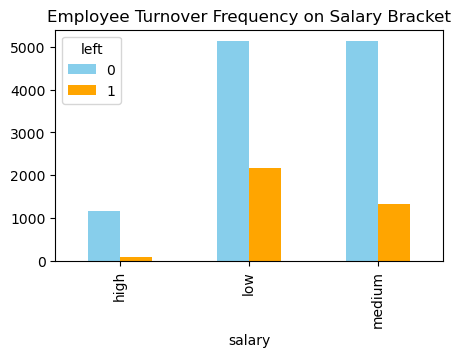

In [30]:
# Create a cross-tabulation
ct = pd.crosstab(df['salary'], df['left'])

# Plot the bar chart
ct.plot(kind='bar', figsize=(5, 3), color=['skyblue', 'orange'])
plt.title('Employee Turnover Frequency on Salary Bracket')

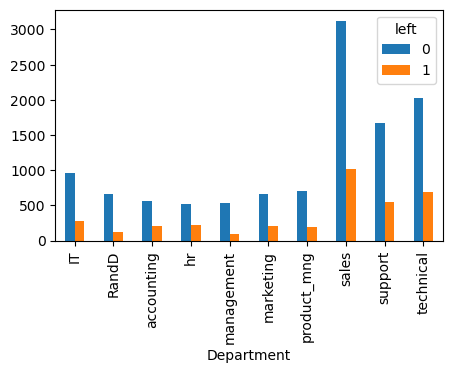

In [31]:
pd.crosstab(df.Department,df.left).plot(kind='bar',figsize=(5, 3))
plt.show()

<h4>From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li><b>Satisfaction Level</b></li>
    <li><b>Average Monthly Hours</b></li>
    <li><b>Promotion Last 5 Years</b></li>
    <li><b>Salary</b></li>
</ol>

In [32]:
subdf=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that.

In [33]:
# One-hot encode the 'salary' column
salary_dummies = pd.get_dummies(subdf['salary'], prefix='salary').astype(int)

In [34]:
df_with_dummies=pd.concat([subdf,salary_dummies],axis=1)

In [35]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [36]:
df_with_dummies.drop('salary',axis=1,inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [37]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [38]:
y = df.left

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
print(f"len(X_train) = {len(X_train)}")
print(f"len(X_train) = {len(X_test)}")


len(X_train) = 11999
len(X_train) = 3000


In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
model.score(X_test,y_test)

0.775

In [46]:
import pickle

In [47]:
with open('HRmodel_pickle','wb') as f:
    pickle.dump(model,f)